Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 317,450 (1.21 MB)

 Trainable params: 317,450 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8461 - loss: 0.5218
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9429 - loss: 0.2337
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9476 - loss: 0.2201
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9570 - loss: 0.1867
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9603 - loss: 0.1715
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9623 - loss: 0.1650
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9638 - loss: 0.1501
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9482 - loss: 0.2475
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9629 - loss: 0.1638
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9657 - loss: 0.1633
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9232 - loss: 0.3709
Epoch 12/20
1875/18

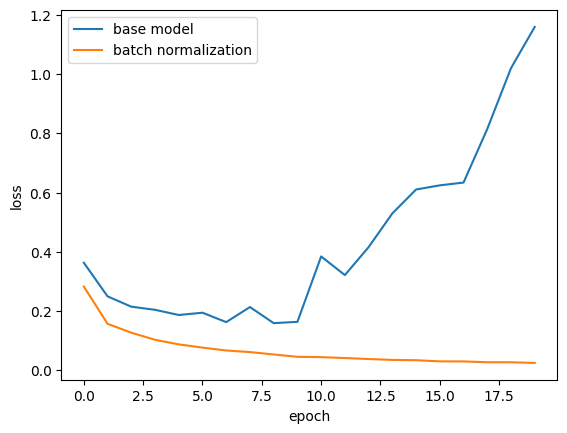

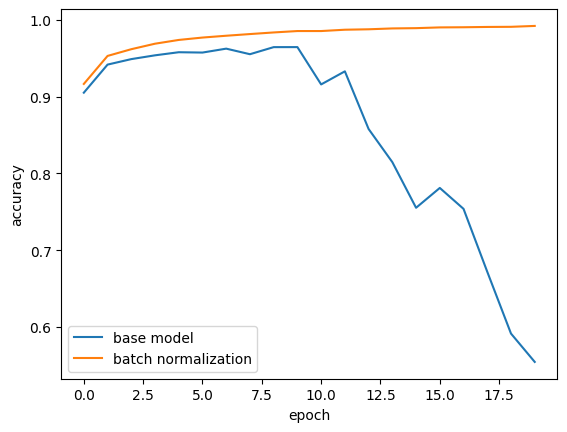

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4709 - loss: 1.2247
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9756 - loss: 0.0979


[0.07649226486682892, 0.9803000092506409]

In [ ]:
import tensorflow as tf #딥러닝
from tensorflow import keras #고수준 API, 신경망 모델을 쉽게 구축하고 훈련
import matplotlib.pyplot as plt #데이터 시각화



(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data() # MNIST 손글씨 숫자(0~9) 데이터셋을 로드 / 훈련데이터와 레이블 / 검증데이터와 레이블
train_x = train_x[..., tf.newaxis] #train_x 데이터의 마지막 차원에 새로운 차원을 추가
test_x = test_x[..., tf.newaxis] #...: 생략된 차원인데, 모든 차원을 유지한다는 의미. / #tf.newaxis: 새로운 차원을 추가.

#MNIST는 2차원 배열인데 딥러닝 모델 인풋은 3차원 이상 텐서를 입력으로 받음 -> 그래서 10, 28, 28 을 10, 28, 28, 1 로 바꿔줌
x_train = train_x / 255. #입력 데이터를 0과 1 사이의 값으로 정규화 / 학습 속도를 향상시키고 모델의 성능을 개선하는 데 도움이 됨
x_test = test_x / 255.


# model.fit: 모델을 학습시킴
# x_train, train_y: 학습 데이터와 레이블을 지정
# epochs: 전체 데이터셋을 몇 번 반복하여 학습할지를 지정.
# batch_size: 한 번에 학습할 데이터의 개수를 지정.

#1. Basic model
#model.add =  Keras의 Sequential 모델에 새로운 층(layer)을 추가하는 메서드
model = keras.Sequential() #tf.keras.Sequential: 순차적인 모델을 정의
model.add(keras.layers.Flatten(input_shape=(28, 28, 1))) #tf.keras.layers.Flatten: 2차원 이미지 데이터를 1차원 벡터로 펼침
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax')) #output 출력층으로, 10개의 클래스(0~9)에 대한 확률을 출력. softmax 활성화 함수를 사용하여 각 클래스에 대한 확률을 계산.

model.summary() #딥러닝 모델의 구조를 요약하여 출력 / 모델층별정보, 총파리미터수, 모델크기 등을 표로 출력해줌


# Adam
adam = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9, #모멘텀, 값 크면 현 업데이트방향 영향력 커져서 학습이 안정적으로 진행, 값작으면 최근 업데이트방향 영향력 커져서 학습 빨라지지만 불안해질 수 있음.
    beta_2=0.999, # RMSpop 감쇠율임, 이전 기울기 제곱의 가중치를 조절, 큰값일수록 이전기울기 제곱 영향력상승, 작은값일수록 최근기울기 제곱 영향력상승
    epsilon=1e-07)

#1. Basic model 학습
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x=x_train, y=train_y, epochs=20)






#3. Basic model + Batch normalization
model_batchnorm = keras.Sequential()
model_batchnorm.add(keras.layers.Flatten(input_shape=(28, 28, 1)))
model_batchnorm.add(keras.layers.Dense(256))
model_batchnorm.add(keras.layers.BatchNormalization())
model_batchnorm.add(keras.layers.ReLU())

model_batchnorm.add(keras.layers.Dense(256))
model_batchnorm.add(keras.layers.BatchNormalization())
model_batchnorm.add(keras.layers.ReLU())

model_batchnorm.add(keras.layers.Dense(128))
model_batchnorm.add(keras.layers.BatchNormalization())
model_batchnorm.add(keras.layers.ReLU())

model_batchnorm.add(keras.layers.Dense(128))
model_batchnorm.add(keras.layers.BatchNormalization())
model_batchnorm.add(keras.layers.ReLU())

model_batchnorm.add(keras.layers.Dense(10))
model_batchnorm.add(keras.layers.Softmax())

#3. batchnorm 학습
adam = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9, #모멘텀, 값 크면 현 업데이트방향 영향력 커져서 학습이 안정적으로 진행, 값작으면 최근 업데이트방향 영향력 커져서 학습 빨라지지만 불안해질 수 있음.
    beta_2=0.999, # RMSpop 감쇠율임, 이전 기울기 제곱의 가중치를 조절, 큰값일수록 이전기울기 제곱 영향력상승, 작은값일수록 최근기울기 제곱 영향력상승
    epsilon=1e-07)
model_batchnorm.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist_batchnorm = model_batchnorm.fit(x=x_train, y=train_y, epochs=20)


#모델 학습결과 시각화
plt.plot(hist.history['loss'], label="base model")
plt.plot(hist_batchnorm.history['loss'], label="batch normalization")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label="base model")
plt.plot(hist_batchnorm.history['accuracy'], label="batch normalization")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


model.evaluate(x_test, test_y)
model_batchnorm.evaluate(x_test, test_y)